- A collection of analyses on models **not fine-tuned** for the stacking dataset.

In [1]:
from utils import (
    align_chunks,
    reduce_chunks_dim,
    get_chunk_pairs_differences
)

from datasets import load_dataset


/Users/francescocapuano/miniconda3/envs/smolvlaenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# SmolVLA

In [ ]:
dataset_id = "fracapuano/smolvla_stacking_action_chunks"

100%|██████████| 1599/1599 [00:58<00:00, 27.14it/s]


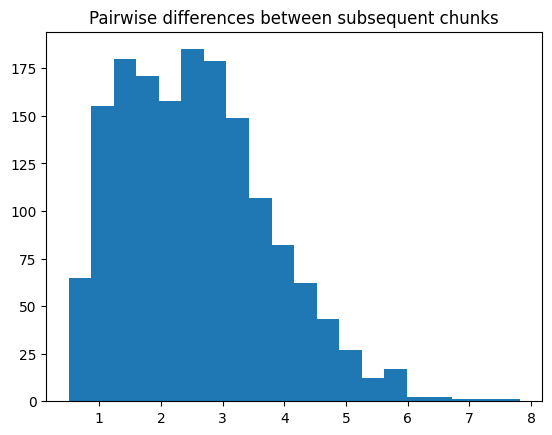

In [2]:
import matplotlib.pyplot as plt
dataset = load_dataset(dataset_id, split="train").with_format("torch")

differences = get_chunk_pairs_differences(dataset, n_chunk_in_pairs=2)

fig, ax = plt.subplots()
ax.hist(differences, bins=20)

ax.set_title("Pairwise differences between subsequent chunks")
plt.show()


In [3]:
pca = reduce_chunks_dim(dataset)

1D projection of action chunk explains variance:  [0.7844443]


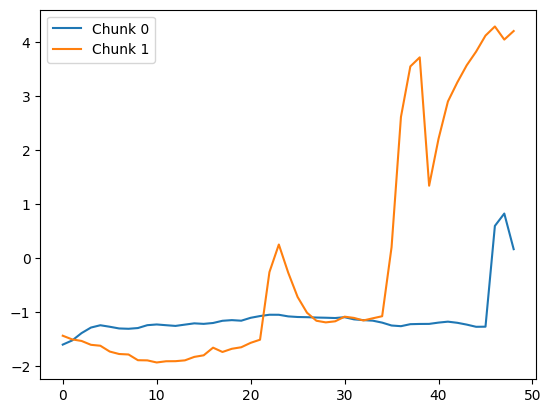

In [5]:
import torch
idx = torch.median(differences, 0).indices.item()

chunks = dataset[idx:idx+2]["action_chunks"]

aligned_chunks = align_chunks(chunks)
reduced_dim_chunks = [pca.transform(aligned_chunks[i]) for i in range(len(aligned_chunks))]

for i in range(len(reduced_dim_chunks)):
    plt.plot(reduced_dim_chunks[i], label=f"Chunk {i}")

plt.legend()
plt.show()

# PI0

In [6]:
dataset_id = "fracapuano/pi0_stacking_action_chunks"

100%|██████████| 1599/1599 [01:06<00:00, 23.89it/s]


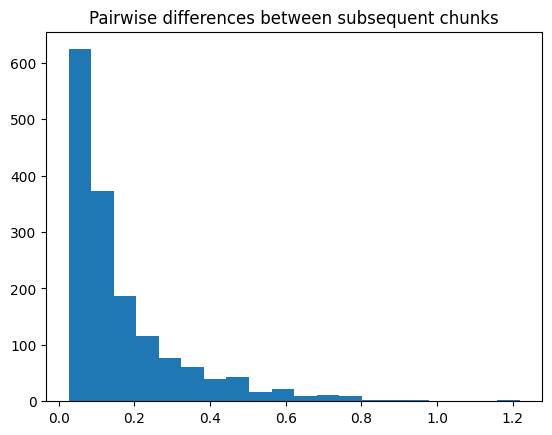

In [7]:
import matplotlib.pyplot as plt
dataset = load_dataset(dataset_id, split="train").with_format("torch")

differences = get_chunk_pairs_differences(dataset, n_chunk_in_pairs=2)

fig, ax = plt.subplots()
ax.hist(differences, bins=20)

ax.set_title("Pairwise differences between subsequent chunks")
plt.show()


In [8]:
pca = reduce_chunks_dim(dataset)

1D projection of action chunk explains variance:  [0.6594855]


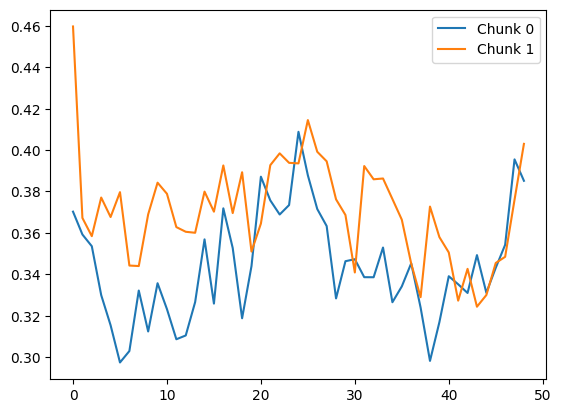

In [9]:
import torch
idx = torch.median(differences, 0).indices.item()

chunks = dataset[idx:idx+2]["action_chunks"]

aligned_chunks = align_chunks(chunks)
reduced_dim_chunks = [pca.transform(aligned_chunks[i]) for i in range(len(aligned_chunks))]

for i in range(len(reduced_dim_chunks)):
    plt.plot(reduced_dim_chunks[i], label=f"Chunk {i}")

plt.legend()
plt.show()